In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.imgedit import PROMPT

c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
interpreter = ProgramInterpreter(dataset='imageEdit')

Registering FACEDET step


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering SEG step


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\transformers\models\maskformer\feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:403: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:410: FutureWarnin

Registering SELECT step


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering COLORPOP step
Registering BGBLUR step
Registering REPLACE step


Fetching 15 files: 100%|██████████| 15/15 [00:00<?, ?it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as runn

Registering EMOJI step
Registering RESULT step


In [4]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt,
                             model="gpt-3.5-turbo-instruct")

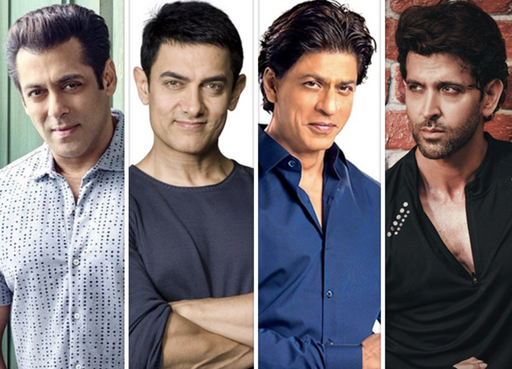

In [5]:
image = Image.open('../assets/bollywood.png')
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [6]:
instruction = "Replace man in black henley (person) with brick wall"

prog,_ = generator.generate(instruction)
print(prog)

OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man in black henley',category='person')
IMAGE0=REPLACE(image=IMAGE,object=OBJ1,prompt='brick wall')
FINAL_RESULT=RESULT(var=IMAGE0)


In [7]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

print(f'\nANSWER: {result}')
HTML(html_str)

SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
REPLACE


  0%|          | 0/50 [00:00<?, ?it/s]